In [7]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [8]:
import re
from datetime import timedelta
def parse_line(filename):
    with open(filename) as f:
        file = f.read()
        
    stats_regex = "\[(?P<epoch>[0-9]+)\] - (.*) - (\d+\.\d+),(\d+\.\d+),(\d+\.\d+)"
    stats_regex = re.compile(stats_regex)
    stats_match = stats_regex.findall(file)
    
    time_regex = "\[([0-9]+)\] - (.*) - (\d\:\d+\:\d+\.\d+)"
    time_regex = re.compile(time_regex)
    times = time_regex.findall(file)
    
    stats = [(int(x[0]), x[1], float(x[2]), float(x[3]), float(x[4])) for x in stats_match]
    #time_matches = [(int(x[0]), x[1], float(x[2]), float(x[3])) for x in stats_match]
    #epoch, text, loss, top1, top5
    
    
    train_stats = [x for x in stats if "train" in x[1]]
    train_times = [x for x in times if "train" in x[1]]
    
    eval_stats = [x for x in stats if "eval" in x[1]]
    eval_times = [x for x in times if "eval" in x[1]]

    return train_stats, train_times, eval_stats, eval_times

In [9]:
def plot_results(filename, stat: str = "loss"):
    stat_map = {"loss":2, "top1":3, "top5": 4}
    index = stat_map.get(stat,2)
    train_stats, train_times, eval_stats, eval_times= parse_line(filename)
    
    plt.plot([x[0] for x in train_stats][2:], np.convolve([x[3] for x in train_stats], np.ones(3)/3, mode='valid'))
    plt.plot([x[0] for x in eval_stats][2:], np.convolve([x[3] for x in eval_stats], np.ones(3)/3, mode='valid'))
    plt.grid(True)
    plt.title(filename)
    plt.xlabel("Epoch")
    plt.ylabel("Top1 Accuracy")
    plt.show()

In [10]:
from datetime import datetime


def parse_dur(string):
    return datetime.strptime(string, "%H:%M:%S.%f") - datetime.strptime("00:00:00.000000", "%H:%M:%S.%f")

In [11]:
def get_time_taken(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    data = {}
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        total_train_times = [parse_dur(x[2]) for x in train_times]
        total_eval_times = [parse_dur(x[2]) for x in eval_times]
        total_duration = timedelta()
        eval_duration = timedelta()
        train_duration = timedelta()
        for dur in total_train_times:
            total_duration += dur
            train_duration += dur
        for dur in total_eval_times:
            total_duration += dur
            eval_duration += dur
        data[os.path.split(root)[-1]]= (total_duration, train_duration, eval_duration, len(total_train_times), len(total_eval_times))
    return data        

In [12]:
def print_results(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    data = {}
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        max_acc = train_stats[0]
        if len(eval_stats) > 0:
            max_acc = max(eval_stats, key=lambda x:x[3])
        #print(f"{os.path.split(root)[-1]:<30} {max_acc[3]}")
        data[os.path.split(root)[-1]] = max_acc
    return data

def parse_name(name):
    parts = name.split("_")
    window = int(parts[1])
    samples = int(parts[2])
    return window, samples

In [13]:
folder = "/media/barny/SSD4/MasterThesis/Data/logs/feature_test/"
files = [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file.startswith(("1","2","3","4","5"))]
for root, file in files:
    print(root,os.path.split(file)[-1])
    pass

/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_0/models 1.epoch_75.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_0/models 2.epoch_79.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_0/models 3.epoch_71.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_0/models 4.epoch_72.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_0/models 5.epoch_74.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_1/models 1.epoch_77.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_1/models 2.epoch_78.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_1/models 3.epoch_75.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-bo-boac_ntu_xsub_1/models 4.epoch_76.pth
/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_an-b

In [14]:
a = print_results("/media/barny/SSD4/MasterThesis/Data/logs/window_tests")
for x in a:
    if x.startswith("default_100_25"):
        print(x,a[x])

default_100_25_0 (72, 'eval stats', 0.09054332511537028, 0.9708333333333333, 0.9995253164556962)
default_100_25_1 (79, 'eval stats', 0.10017106923955998, 0.9683544303797469, 0.9991033755274261)
default_100_25_2 (78, 'eval stats', 0.09769765478277566, 0.9685126582278482, 0.9993670886075949)


In [15]:
folder = "/media/barny/SSD4/MasterThesis/Data/logs/norm_tests/"
a = print_results(folder)
for x in sorted(a.keys()):
    print(x,",",a[x][3])

ap_2p_ntu120xsub_mean_spine , 0.9242034943473793
ap_2p_ntu120xsub_mean_spine_0 , 0.9238609112709832
ap_2p_ntu120xsub_mean_spine_align , 0.9284001370332305
ap_2p_ntu120xsub_mean_spine_align_0 , 0.9265159301130524
ap_2p_ntu120xsub_none , 0.9249743062692704
ap_2p_ntu120xsub_none_0 , 0.9245460774237753
ap_2p_ntu120xsub_relative , 0.9194073312778349
ap_2p_ntu120xsub_relative_0 , 0.9164097293593696
ap_2p_ntu120xsub_screen , 0.9260020554984584
ap_2p_ntu120xsub_screen_0 , 0.9276293251113396
ap_2p_ntu120xsub_spine , 0.9251455978074683
ap_2p_ntu120xsub_spine_0 , 0.9188078108941419
ap_2p_ntu120xsub_spine_align , 0.9242034943473793
ap_2p_ntu120xsub_spine_align_0 , 0.9260020554984584
ap_ntu120xsub_mean_spine , 0.8171165884194053
ap_ntu120xsub_mean_spine_0 , 0.8170774647887324
ap_ntu120xsub_mean_spine_align , 0.8312793427230047
ap_ntu120xsub_mean_spine_align_0 , 0.8325508607198748
ap_ntu120xsub_none , 0.7775039123630673
ap_ntu120xsub_none_0 , 0.8188184663536776
ap_ntu120xsub_relative , 0.76553208137

In [16]:
folder = "/media/barny/SSD4/MasterThesis/Data/logs/prep_tests/"
a = print_results(folder)
for x in sorted(a.keys()):
    print(x,a[x])

default_0 (72, 'eval stats', 0.629566012583673, 0.8326291079812207, 0.9699921752738654)
filling_mice_0 (24, 'eval stats', 5.662955627441407, 0.11036776212832551, 0.29231220657276996)
filling_mice_mean_0 (44, 'eval stats', 5.524981154203415, 0.11044600938967136, 0.27650625978090765)
filling_none_0 (75, 'eval stats', 0.6475859356671572, 0.8312206572769953, 0.9690923317683882)
filling_zero_0 (76, 'eval stats', 0.6467198770493269, 0.8254499217527387, 0.9684272300469483)
no_filters_0 (72, 'eval stats', 0.6532622848637402, 0.8248435054773083, 0.9686815336463224)
no_nms_0 (78, 'eval stats', 0.6275394706241787, 0.8318466353677622, 0.9709898278560251)
no_tracking_conf_0 (78, 'eval stats', 0.6366492766700685, 0.8305751173708921, 0.9701682316118936)
no_tracking_order_0 (74, 'eval stats', 0.6267616847157478, 0.8319053208137716, 0.9716353677621283)
no_tracking_size_0 (79, 'eval stats', 0.6372784445434809, 0.8291275430359938, 0.9708920187793427)


In [17]:
folder = "/media/barny/SSD4/MasterThesis/Data/logs/labeling_types/"
a = print_results(folder)
for x in sorted(a.keys()):
    print(x,a[x])

2pgcn_distance_mutual-inter_false (75, 'eval stats', 0.3141315404142513, 0.9194073312778349, 0.9914354230900994)
2pgcn_distance_mutual-inter_true (72, 'eval stats', 0.32156443299440657, 0.9201781431997259, 0.9905789653991093)
2pgcn_distance_mutual_false (64, 'eval stats', 0.2996679098380964, 0.9241178485782803, 0.9894655704008222)
2pgcn_distance_mutual_true (79, 'eval stats', 0.290591106068119, 0.9251455978074683, 0.9914354230900994)
2pgcn_spatial_mutual-inter_false (76, 'eval stats', 0.2931192835132576, 0.921377183967112, 0.9918636519355943)
2pgcn_spatial_mutual-inter_true (69, 'eval stats', 0.28163339094961154, 0.9262589928057554, 0.9924631723192874)
2pgcn_spatial_mutual_false (70, 'eval stats', 0.28045810295314694, 0.9274580335731415, 0.9925488180883865)
2pgcn_spatial_mutual_true (75, 'eval stats', 0.2728857922092935, 0.9256594724220624, 0.9924631723192874)


In [16]:
from collections import defaultdict

data = [print_results("/media/barny/SSD4/MasterThesis/Data/logs/window_tests")]
data = [print_results(folder)]
avg = defaultdict(list)
for d in data:
    for k,v in d.items():
        kk = "_".join(k.split("_")[:-1])
        avg[kk].append(v)
#avg = sorted([(k,np.mean(v)) for k,v in avg.items()], key=lambda x:np.mean(x[1]))
avg = sorted([(k,np.mean(v)) for k,v in avg.items()], key=lambda x:x[1])
for k,v in avg:
    print(k,v)

stgcn_anmo_ntu120_xsub 0.7734546165884194
stgcn_boan_ntu120_xsub 0.775039123630673
stgcn_an_ntu120_xsub 0.7758998435054774
stgcn_boac_ntu120_xsub 0.8009194053208137
stgcn_joac_ntu120_xsub 0.8080203442879499
stgcn_anmo_ntu120_xset 0.8153112449799197
stgcn_bomo_ntu120_xsub 0.821028951486698
stgcn_an_ntu120_xset 0.8212684069611781
stgcn_boan_ntu120_xset 0.8232262382864792
stgcn_jomo_ntu120_xsub 0.8248239436619719
stgcn_bo_ntu120_xsub 0.8279929577464789
stgcn_jore_ntu120_xsub 0.8287363067292645
stgcn_jo_ntu120_xsub 0.8320422535211267
stgcn_boac_ntu120_xset 0.8396586345381526
stgcn_an_ntu_xview 0.849789029535865
stgcn_joac_ntu120_xset 0.8504183400267737
stgcn_bomo_ntu120_xset 0.8550870147255689
stgcn_anmo_ntu_xview 0.8572784810126582
stgcn_bo_ntu120_xset 0.8574966532797859
stgcn_jomo_ntu120_xset 0.8582831325301205
stgcn_jore_ntu120_xset 0.861830655957162
stgcn_jo_ntu120_xset 0.864892904953146
stgcn_boan_ntu_xsub 0.8666062801932367
stgcn_anmo_ntu_xsub 0.8673309178743961
stgcn_an_ntu_xsub 0.8

In [23]:
def plt_multiple(folder):
    files= [os.path.join(root, file) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key=os.path.getmtime)
    for file in files:
        if "_jo_" not in file:
            continue
        print(file)
        plot_results(file)

/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_jo_ntu_xview_0/training.log


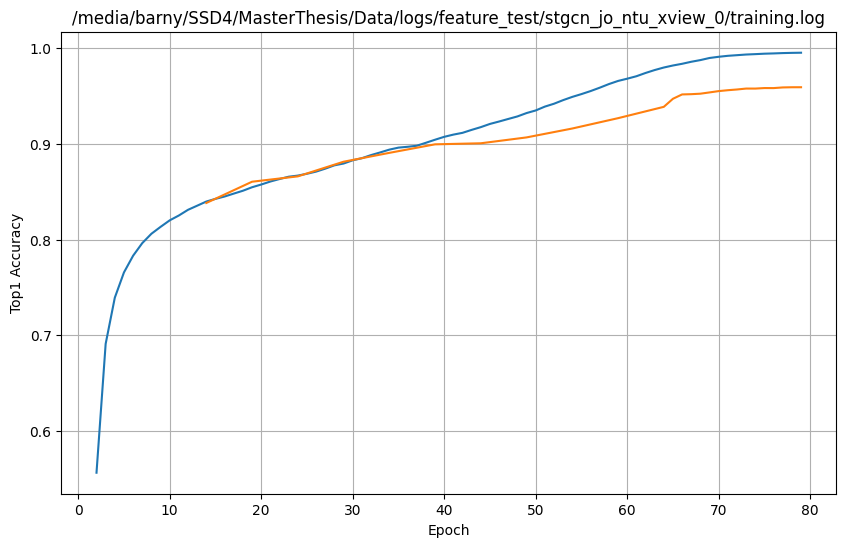

/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_jo_ntu_xsub_0/training.log


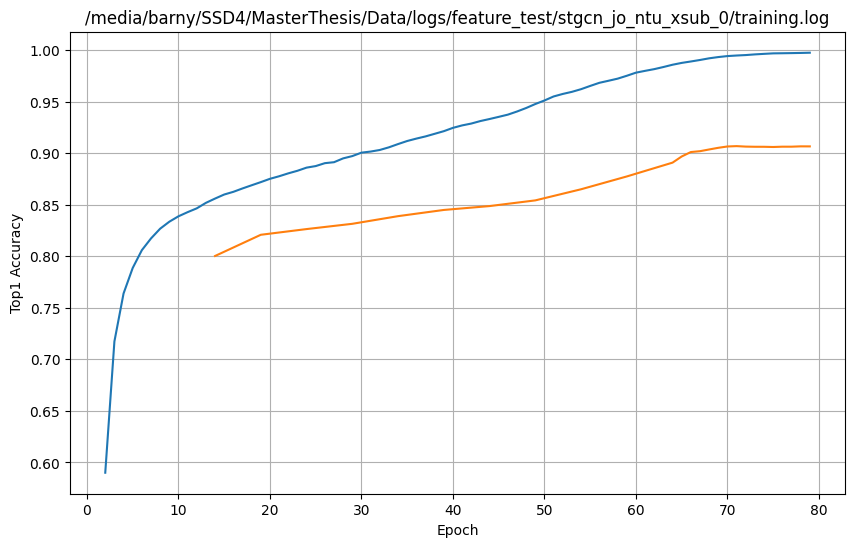

/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_jo_ntu120_xsub_0/training.log


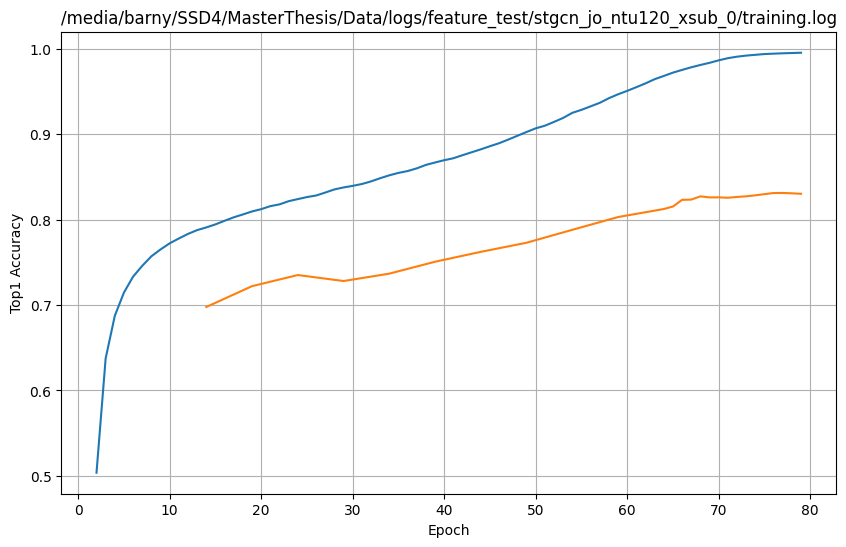

/media/barny/SSD4/MasterThesis/Data/logs/feature_test/stgcn_jo_ntu120_xset_0/training.log


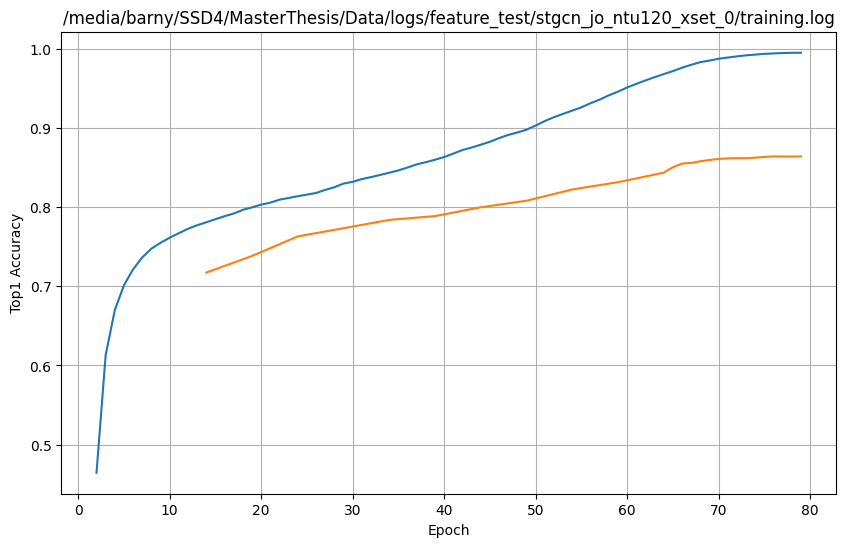

In [24]:
plt_multiple("/media/barny/SSD4/MasterThesis/Data/logs/feature_test/")

In [ ]:
plt_multiple("./logs/augment_test")